# Exploratory Data Analysis (EDA) for Superstore Dataset

## 1. Introduction
- **Objective**: Briefly describe the goal of the analysis.
- **Dataset**: Provide a short description of the dataset (e.g., source, size, and key features).

## 2. Setup Environment
- **Imports**: List the libraries used for the analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load Data
- **Data Loading**: Describe how the data is loaded into the notebook.

In [4]:
df = pd.read_csv("D:/repositories/Superstore-EDA-analysis/data/Sample_Superstore.csv", encoding='ISO-8859-1')

## 4. Data Overview
- **Shape of the Dataset**: Display the number of rows and columns.

In [5]:
print("Dataset shape: ", df.shape)

Dataset shape:  (9994, 21)


In [6]:
print("\nColumn Information:")
print(df.info())


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   

## 5. Descriptive Statistics
- **Summary Statistics**: Display basic statistical details.

In [7]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


## 5. Data Cleaning
- **Missing Values**: Describe how missing values are handled.

In [8]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
""" # Fill missing values
df.fillna({'State': 'Unknown', 'Postal Code': 0}, inplace=True)

# Duplicate the DataFrame
df_duplicate = df.copy()

# Display the duplicated DataFrame
print(df_duplicate.head())

or 

# Step 4: Handling Missing Values (Modify as needed)
df.fillna(df.mean(), inplace=True)  # Example: Fill missing numerical values with mean
 """

" # Fill missing values\ndf.fillna({'State': 'Unknown', 'Postal Code': 0}, inplace=True)\n\n# Duplicate the DataFrame\ndf_duplicate = df.copy()\n\n# Display the duplicated DataFrame\nprint(df_duplicate.head())\n\nor \n\n# Step 4: Handling Missing Values (Modify as needed)\ndf.fillna(df.mean(), inplace=True)  # Example: Fill missing numerical values with mean\n "

## 5.1 Descriptive Statistics
- **Summary Statistics**: Display basic statistical details.

In [10]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


## 6. Univariate Analysis
- **Distribution of Numerical Columns**: Plot histograms for numerical columns.

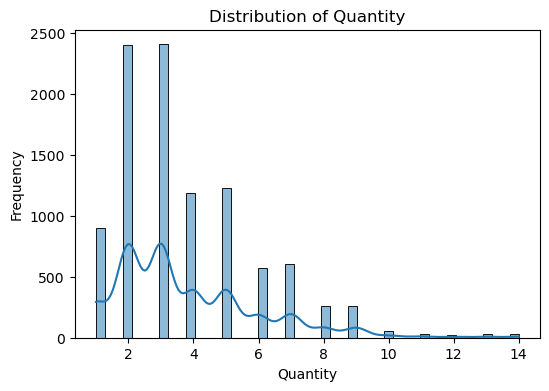

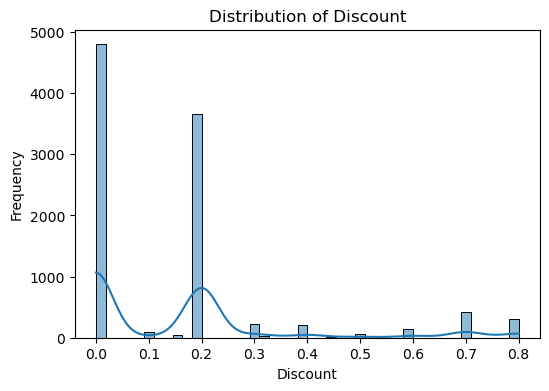

In [11]:
# Univariate Analysis
# Histogram for numerical columns
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.savefig(f"images/distribution_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG file with column name
    plt.show()

## 7. Bivariate Analysis
- **Correlation Heatmap**: Display correlation between numerical features.

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig("images/correlation_heatmap.png", dpi=300, bbox_inches='tight')  # Save as PNG file
plt.show()

# Select only numeric columns

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


# Calculate correlation coefficients

In [14]:
correlation_matrix = numeric_df.corr()
sales_corr = correlation_matrix["Sales"].sort_values(ascending=False)

print(sales_corr)

Sales          1.000000
Profit         0.479064
Quantity       0.200795
Row ID        -0.001359
Postal Code   -0.023854
Discount      -0.028190
Name: Sales, dtype: float64


based on the correlation and data characteristics, is the "Profit" column. It has the highest positive correlation with "Sales" and is a key metric for analysis.

In [15]:
# Outlier Detection (Boxplot Method for Profit)
plt.figure(figsize=(10, 6))
sns.boxplot(y=df[column])
plt.title('Boxplot of Profit')
#plt.savefig("images/boxplot_profit.png", dpi=300, bbox_inches='tight')  # Save as PNG file
plt.show()


## 8. One-Hot Encoding for Categorical Variables
One-hot encoding is a process that converts categorical variables into a format that can be provided to machine learning algorithms to improve predictions. This is done by creating new binary columns for each category of the categorical variable.

For example, if the `Ship Mode` column has the categories `First Class`, `Second Class`, `Standard Class`, and `Same Day`, one-hot encoding will create four new columns: `Ship Mode_First Class`, `Ship Mode_Second Class`, `Ship Mode_Standard Class`, and `Ship Mode_Same Day`. Each row will have a value of 1 in the column corresponding to its category and 0 in the other columns.

In [16]:
# Define columns to encode
columns_to_encode = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']

# Apply one-hot encoding to the specified columns if they exist in the dataframe
columns_to_encode = [col for col in columns_to_encode if col in df.columns]
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)


## 9. Final Dataset Overview

In this step, we are verifying the final state of our dataset after all transformations. We print the shape of the dataset to check the number of rows and columns, and we display the first 5 rows to inspect the data visually. This helps ensure that our preprocessing steps, such as encoding and cleaning, have been applied correctly.

In [18]:
# Step 10: Final Dataset Overview
print("\nUpdated Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())


Updated Dataset Shape: (9994, 617)

First 5 Rows:
   Row ID        Order ID  Order Date   Ship Date Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015    SO-20335   

     Customer Name  Postal Code       Product ID  \
0      Claire Gute        42420  FUR-BO-10001798   
1      Claire Gute        42420  FUR-CH-10000454   
2  Darrin Van Huff        90036  OFF-LA-10000240   
3   Sean O'Donnell        33311  FUR-TA-10000577   
4   Sean O'Donnell        33311  OFF-ST-10000760   

                                        Product Name     Sales  ...  \
0                  Bush Somerset Collection Bookcase  261.9600  ...   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  ...   
2  Self-Adhesive Address Labels 

### Save Cleaned Dataset
to preserve the current state of the dataset for future use, ensuring that we don't need to repeat the preprocessing steps. The dataset is saved without the index to keep the file clean and concise.

In [19]:
# Step 10: Save Cleaned Dataset
df.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'


In [20]:
df = pd.read_csv(r"cleaned_dataset.csv")  # Adjust file name if necessary

In [21]:
print(df.isnull().sum())  # Check for missing values
print(df.dtypes)  # Confirm correct data types
print(df.duplicated().sum())  # Check for duplicates


Row ID                   0
Order ID                 0
Order Date               0
Ship Date                0
Customer ID              0
                        ..
Sub-Category_Paper       0
Sub-Category_Phones      0
Sub-Category_Storage     0
Sub-Category_Supplies    0
Sub-Category_Tables      0
Length: 617, dtype: int64
Row ID                    int64
Order ID                 object
Order Date               object
Ship Date                object
Customer ID              object
                          ...  
Sub-Category_Paper         bool
Sub-Category_Phones        bool
Sub-Category_Storage       bool
Sub-Category_Supplies      bool
Sub-Category_Tables        bool
Length: 617, dtype: object
0


In [22]:
print("All Columns:")
print(df.columns)

All Columns:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID',
       'Customer Name', 'Postal Code', 'Product ID', 'Product Name', 'Sales',
       ...
       'Sub-Category_Envelopes', 'Sub-Category_Fasteners',
       'Sub-Category_Furnishings', 'Sub-Category_Labels',
       'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables'],
      dtype='object', length=617)


In [24]:
df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce")
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")


In [25]:
print(df.head())  # Check the first few rows

   Row ID        Order ID  Order Date   Ship Date Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015    SO-20335   

     Customer Name  Postal Code       Product ID  \
0      Claire Gute        42420  FUR-BO-10001798   
1      Claire Gute        42420  FUR-CH-10000454   
2  Darrin Van Huff        90036  OFF-LA-10000240   
3   Sean O'Donnell        33311  FUR-TA-10000577   
4   Sean O'Donnell        33311  OFF-ST-10000760   

                                        Product Name     Sales  ...  \
0                  Bush Somerset Collection Bookcase  261.9600  ...   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  ...   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  ...   
3      Bretf

In [26]:
print(df[["Sales", "Profit"]].dtypes)

Sales     float64
Profit    float64
dtype: object


In [27]:
# Identify sub-category columns
sub_category_cols = [col for col in df.columns if col.startswith("Sub-Category_")]

# Melt the data to reshape it
df_melted = df.melt(id_vars=["Sales", "Profit"], value_vars=sub_category_cols,
                     var_name="Sub-Category", value_name="Presence")

# Filter out rows where the product was not present (Presence = 0 or NaN)
df_melted = df_melted[df_melted["Presence"] > 0]

# Clean the 'Sub-Category' column by removing the prefix
df_melted["Sub-Category"] = df_melted["Sub-Category"].str.replace("Sub-Category_", "")

print(df_melted.head())  # Check the new structure


     Sales    Profit Sub-Category  Presence
9   114.90   34.4700   Appliances      True
14   68.81 -123.8580   Appliances      True
22   60.34   15.6884   Appliances      True
79  208.16   56.2032   Appliances      True
98   77.88   22.5852   Appliances      True


In [29]:
# Check if 'Sub-Category' column exists in the dataframe
if 'Sub-Category' in df_melted.columns:
    # Group by 'Sub-Category' and sum Sales & Profit
    category_sales_profit = df_melted.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()

    # Plot total sales and profit per sub-category
    plt.figure(figsize=(12, 6))
    category_sales_profit.plot(kind="bar", x='Sub-Category', y=['Sales', 'Profit'], figsize=(12, 6), color=["blue", "green"])

    plt.title("Total Sales & Profit by Sub-Category")
    plt.xlabel("Sub-Category")
    plt.ylabel("Total Amount")
    plt.xticks(rotation=90)
    plt.legend(["Sales", "Profit"])
    #plt.savefig("images/Total Sales & Profit by Sub-Category.png", dpi=300, bbox_inches='tight')  # Save as PNG file
    plt.show()
else:
    print("The 'Sub-Category' column does not exist in the dataframe.")


<Figure size 1200x600 with 0 Axes>

In [30]:
# Sort the dataframe by Sales in descending order and select the top 7 sub-categories
top_7_sub_categories = category_sales_profit.sort_values(by='Sales', ascending=False).head(7)

# Plot the top 7 sub-categories
plt.figure(figsize=(12, 6))
top_7_sub_categories.plot(kind="bar", x='Sub-Category', y=['Sales', 'Profit'], figsize=(12, 6), color=["blue", "green"])

plt.title("Top 7 Sub-Categories by Sales")
plt.xlabel("Sub-Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.legend(["Sales", "Profit"])
#plt.savefig("images/Top 7 Sub-Categories by Sales.png", dpi=300, bbox_inches='tight')  # Save as PNG file
plt.show()

<Figure size 1200x600 with 0 Axes>

In [31]:
# Ensure df is defined
if 'df' in globals():
    # Group by Customer ID and calculate total sales per customer
    customer_sales = df.groupby("Customer ID")["Sales"].sum().reset_index()

    # Categorizing customers based on total spend
    customer_sales["Segment"] = pd.qcut(customer_sales["Sales"], q=4, 
                                        labels=["Low", "Medium", "High", "VIP"])

    # Check the first few rows
    print(customer_sales.head())
else:
    print("DataFrame 'df' is not defined. Please ensure the cell defining 'df' is executed.")

  Customer ID     Sales Segment
0    AA-10315  5563.560     VIP
1    AA-10375  1056.390     Low
2    AA-10480  1790.512  Medium
3    AA-10645  5086.935     VIP
4    AB-10015   886.156     Low


In [32]:
# Merge with profit data
customer_profit = df.groupby("Customer ID")["Profit"].sum().reset_index()
customer_data = customer_sales.merge(customer_profit, on="Customer ID")

# Group by segment
segment_analysis = customer_data.groupby("Segment")[["Sales", "Profit"]].mean()

print(segment_analysis)

               Sales      Profit
Segment                         
Low       635.355454   68.816609
Medium   1675.177048  160.729692
High     2911.185055  269.518861
VIP      6377.098124  947.036884


C:\Users\yrehi\AppData\Local\Temp\ipykernel_1764\324001976.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = customer_data.groupby("Segment")[["Sales", "Profit"]].mean()


C:\Users\yrehi\AppData\Local\Temp\ipykernel_1764\1252233553.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_analysis.index, y="Sales", data=segment_analysis, palette="coolwarm")


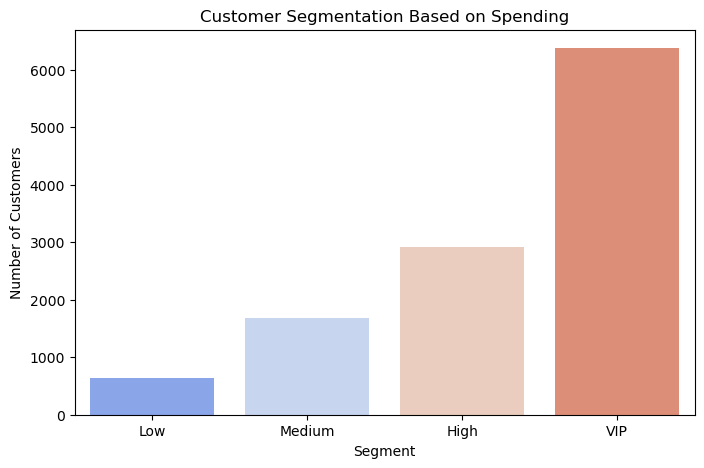

In [33]:
plt.figure(figsize=(8, 5))

sns.barplot(x=segment_analysis.index, y="Sales", data=segment_analysis, palette="coolwarm")

plt.title("Customer Segmentation Based on Spending")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
save_path = "images/Customer Segmentation Based on Spending.png"

plt.show()

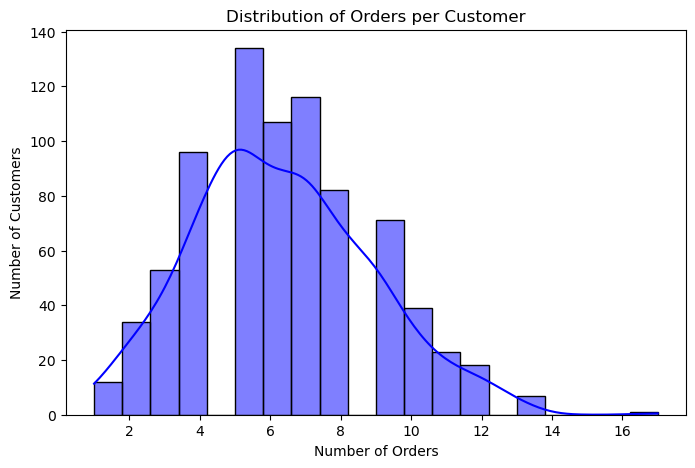

In [34]:
# Count the number of orders per customer
customer_orders = df.groupby("Customer ID")["Order ID"].nunique().reset_index()
customer_orders.columns = ["Customer ID", "Total Orders"]

plt.figure(figsize=(8, 5))
sns.histplot(customer_orders["Total Orders"], bins=20, kde=True, color="blue")

plt.title("Distribution of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()


In [35]:
# Calculate Average Order Value (AOV)
df["Order Value"] = df["Sales"]
aov = df.groupby("Order ID")["Order Value"].sum().mean()

print(f" Average Order Value: ${aov:.2f}")

 Average Order Value: $458.61


In [36]:
# Calculate total revenue per customer
customer_revenue = df.groupby("Customer ID")["Sales"].sum()

# Estimate Customer Lifetime Value (CLV) as avg order value Ã— avg orders per customer
clv = customer_revenue.mean() * customer_orders["Total Orders"].mean()

print(f" Estimated Customer Lifetime Value (CLV): ${clv:.2f}")

 Estimated Customer Lifetime Value (CLV): $18298.00


In [37]:
# Convert Order Date to datetime format if not already
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Find the first and last purchase date per customer
customer_purchase_dates = df.groupby("Customer ID")["Order Date"].agg(["min", "max"]).reset_index()
customer_purchase_dates.columns = ["Customer ID", "First Purchase", "Last Purchase"]

# Calculate retention duration (days between first and last purchase)
customer_purchase_dates["Retention Days"] = (customer_purchase_dates["Last Purchase"] - 
                                             customer_purchase_dates["First Purchase"]).dt.days

# Display retention stats
print(customer_purchase_dates.describe()[["Retention Days"]])

       Retention Days
count      793.000000
mean       999.650694
min          0.000000
25%        829.000000
50%       1092.000000
75%       1222.000000
max       1440.000000
std        309.869711


C:\Users\yrehi\AppData\Local\Temp\ipykernel_1764\3751730668.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Order Day", y="Sales", data=sales_by_day, palette="Blues")


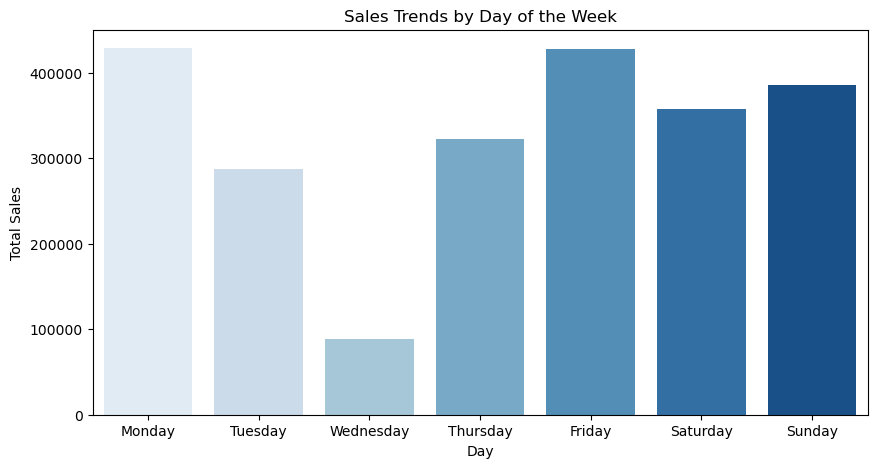

In [38]:
# Extract day of the week
df["Order Day"] = df["Order Date"].dt.day_name()

# Group by day and calculate total sales
sales_by_day = df.groupby("Order Day")["Sales"].sum().reset_index()

# Sort days in order (Monday â†’ Sunday)
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day["Order Day"] = pd.Categorical(sales_by_day["Order Day"], categories=days_order, ordered=True)
sales_by_day = sales_by_day.sort_values("Order Day")

plt.figure(figsize=(10, 5))
sns.barplot(x="Order Day", y="Sales", data=sales_by_day, palette="Blues")

plt.title("Sales Trends by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.show()

In [39]:
# Find the most recent order date
latest_order_date = df["Order Date"].max()

# Calculate days since last purchase for each customer
customer_purchase_dates["Days Since Last Purchase"] = (latest_order_date - 
                                                       customer_purchase_dates["Last Purchase"]).dt.days

# Define churn threshold (e.g., customers inactive for 180+ days)
churn_threshold = 180
customer_purchase_dates["Churned"] = customer_purchase_dates["Days Since Last Purchase"] > churn_threshold

# Calculate churn rate
churn_rate = customer_purchase_dates["Churned"].mean() * 100

print(f" Customer Churn Rate: {churn_rate:.2f}% of customers haven't purchased in {churn_threshold} days.")

 Customer Churn Rate: 25.09% of customers haven't purchased in 180 days.


ðŸ“Œ Customer Segmentation Using K-Means Clustering

Understanding customer behavior helps businesses personalize marketing and improve retention strategies. We segment customers based on:

In [40]:
from datetime import datetime

Recency (R): How recently they made a purchase.
Frequency (F): How often they buy.
Monetary Value (M): How much they spend.

In [41]:
# Ensure Order Date is in datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Define latest date in dataset
latest_date = df["Order Date"].max()

# Calculate RFM metrics
rfm = df.groupby("Customer ID").agg({
    "Order Date": lambda x: (latest_date - x.max()).days,  # Recency (days since last purchase)
    "Order ID": "nunique",  # Frequency (total orders)
    "Sales": "sum"  # Monetary Value (total spent)
}).reset_index()

# Rename columns
rfm.columns = ["Customer ID", "Recency", "Frequency", "Monetary"]

# Display summary
print(rfm.head())

  Customer ID  Recency  Frequency  Monetary
0    AA-10315      184          5  5563.560
1    AA-10375       19          9  1056.390
2    AA-10480      259          4  1790.512
3    AA-10645       55          6  5086.935
4    AB-10015      415          3   886.156


In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

To determine the best number of customer groups, we use the Elbow Method, which identifies the ideal number of clusters for segmentation.

ðŸ’¡ Why? It helps avoid too many small groups or overgeneralized clusters.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

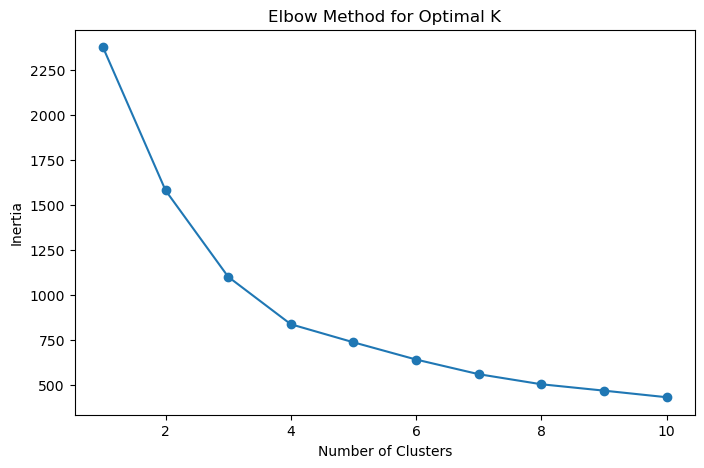

In [44]:
# Scale data for better clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

# Determine optimal number of clusters using Elbow Method
import matplotlib.pyplot as plt
import numpy as np

inertia = []
for k in range(1, 11):  # Checking for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

Applying K-Means Clustering
Once we find the right number of clusters (K), we assign each customer to a segment:

 VIP Customers: High spenders, frequent buyers.
 Loyal Customers: Repeat buyers, moderate spend.
 At-Risk Customers: Havenâ€™t bought recently, low engagement.
 New Customers: First-time buyers or occasional shoppers.

In [45]:
# Apply K-Means with optimal clusters (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# Display cluster summary (select only numeric columns)
numeric_columns = rfm.select_dtypes(include=["number"]).columns
print(rfm.groupby("Cluster")[numeric_columns].mean())

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


            Recency  Frequency     Monetary  Cluster
Cluster                                             
0         71.741611   8.516779  3322.222985      0.0
1        100.197015   4.731343  1669.688290      1.0
2        122.718750   8.296875  9479.545687      2.0
3        558.489583   3.697917  1470.228226      3.0


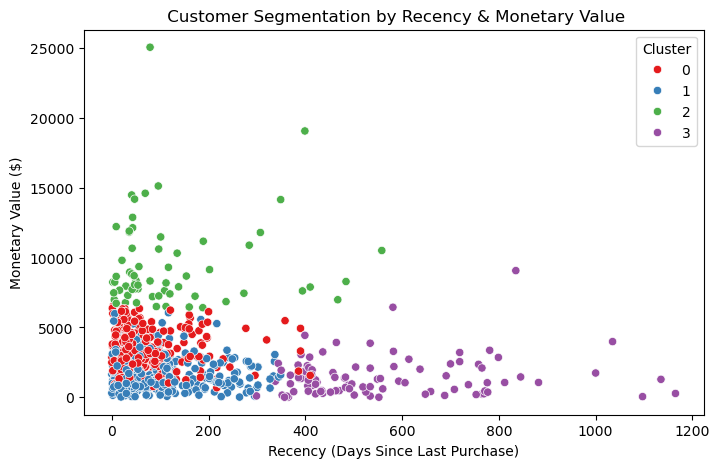

In [46]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x=rfm["Recency"], y=rfm["Monetary"], hue=rfm["Cluster"], palette="Set1")
plt.title(" Customer Segmentation by Recency & Monetary Value")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Monetary Value ($)")

plt.show()

In [47]:
# Check if 'Sub-Category' column exists
if 'Sub-Category' in df.columns:
	# Pivot data to create a transactional format (Each row is an order, each column is a product)
	basket = df.groupby(['Order ID', 'Sub-Category'])['Quantity'].sum().unstack().fillna(0)
elif any(col.startswith('Sub-Category_') for col in df.columns):
	# If one-hot encoding was applied, reconstruct the 'Sub-Category' column
	sub_category_cols = [col for col in df.columns if col.startswith('Sub-Category_')]
	df['Sub-Category'] = df[sub_category_cols].idxmax(axis=1).str.replace('Sub-Category_', '')
	basket = df.groupby(['Order ID', 'Sub-Category'])['Quantity'].sum().unstack().fillna(0)
else:
	raise KeyError("The 'Sub-Category' column is missing and cannot be reconstructed.")

# Convert to binary format (1 if bought, 0 if not)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Display transformed dataset
basket.head()


C:\Users\yrehi\AppData\Local\Temp\ipykernel_1764\1099259722.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Sub-Category    Appliances  Art  Binders  Bookcases  Chairs  Copiers  \
Order ID                                                               
CA-2014-100006           0    0        0          0       0        0   
CA-2014-100090           0    0        1          0       0        0   
CA-2014-100293           0    0        0          0       0        0   
CA-2014-100328           0    0        1          0       0        0   
CA-2014-100363           0    0        0          0       0        0   

Sub-Category    Envelopes  Fasteners  Furnishings  Labels  Machines  Paper  \
Order ID                                                                     
CA-2014-100006          0          0            0       0         0      0   
CA-2014-100090          0          0            0       0         0      0   
CA-2014-100293          0          0            0       0         0      1   
CA-2014-100328          0          0            0       0         0      0   
CA-2014-100363          0          1            0       0         0      1   

Sub-Category    Phones  Storage  Supplies  Tables  
Order ID                                           
CA-2014-100006       1        0         0       0  
CA-2014-100090       0        0         0       1  
CA-2014-100293       0        0         0       0  
CA-2014-100328       0        0         0       0  
CA-2014-100363       0        0         0       0

In [50]:
from mlxtend.frequent_patterns import apriori, association_rules

ModuleNotFoundError: No module named 'mlxtend'